In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Retail-data.csv')

In [3]:
df.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,...,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
0,23-05-2021 00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,23-05-2021 01:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,23-05-2021 02:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,23-05-2021 03:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,23-05-2021 04:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Is Sales trend common for each timeline like year,month,day,week? (Graph Expected)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101929 entries, 0 to 101928
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   hour                    101929 non-null  datetime64[ns]
 1   order_id                101929 non-null  float64       
 2   customer_id             101929 non-null  float64       
 3   product_id              101929 non-null  float64       
 4   product_price           101929 non-null  float64       
 5   variant_id              101929 non-null  float64       
 6   orders                  101929 non-null  int64         
 7   gross_sales             101929 non-null  float64       
 8   discounts               101929 non-null  float64       
 9   returns                 101929 non-null  float64       
 10  net_sales               101929 non-null  float64       
 11  shipping                101929 non-null  float64       
 12  taxes                   101929

### First we have to change its type from object to date time category

In [5]:
df['hour'] = pd.to_datetime(df['hour'])  

In [6]:
df['year'] = df['hour'].dt.year

In [7]:
df['month'] = df['hour'].dt.month

In [8]:
df['week'] = df['hour'].dt.week

C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\2482767885.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['hour'].dt.week


In [9]:
df['day'] = df['hour'].dt.day

In [10]:
df['name'] = df['hour'].dt.weekday

In [11]:
df['year'].nunique()

2

In [12]:
df['year'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
101924    2022
101925    2022
101926    2022
101927    2022
101928    2022
Name: year, Length: 101929, dtype: int64>

In [13]:
gf = df.groupby('year')['total_sales'].sum()

Text(0, 0.5, 'Total Sales')

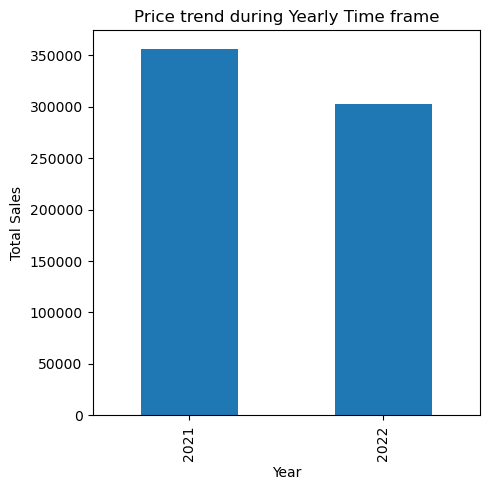

In [14]:
fig = gf.plot(kind='bar', figsize=(5,5))
fig.set_title('Price trend during Yearly Time frame')
fig.set_xlabel('Year')
fig.set_ylabel('Total Sales')

In [15]:
df['month_year'] = df['hour'].dt.to_period('M')

In [16]:
df.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,...,product_title,product_vendor,variant_title,api_client_title,year,month,week,day,name,month_year
0,2021-05-23 00:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05
1,2021-05-23 01:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05
2,2021-05-23 02:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05
3,2021-05-23 03:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05
4,2021-05-23 04:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05


In [17]:
mf1 = df.groupby('month_year')['total_sales'].sum()
mf1

month_year
2021-01     9375.48
2021-02    12140.04
2021-03    14160.08
2021-04    10834.62
2021-05    23153.30
2021-06    31280.14
2021-07    45151.84
2021-08    35329.70
2021-09    38975.92
2021-10    47934.26
2021-11    43295.98
2021-12    44843.14
2022-01    49199.18
2022-02    40964.40
2022-03    47684.40
2022-04    47013.68
2022-05    46120.26
2022-06     9679.66
2022-07     9725.70
2022-08    12111.14
2022-09     9217.40
2022-10     8982.76
2022-11     9113.22
2022-12    13107.18
Freq: M, Name: total_sales, dtype: float64

Text(0, 0.5, 'Total Sales')

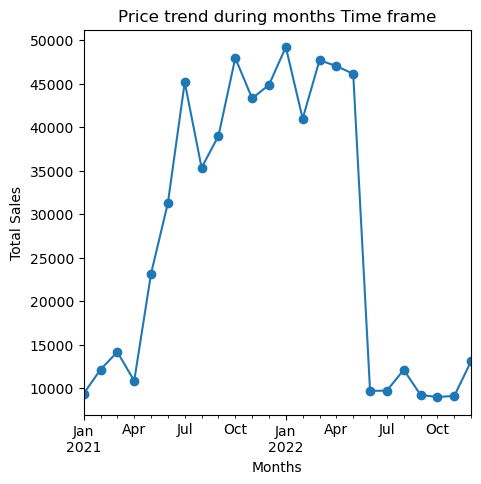

In [18]:
fig = mf1.plot(kind='line', figsize=(5,5), marker='o')
fig.set_title('Price trend during months Time frame')
fig.set_xlabel('Months')
fig.set_ylabel('Total Sales')

In [19]:
# data of 2021 only
year_2021=df[df['year'] == 2021]
year_2021.head(2)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,...,product_title,product_vendor,variant_title,api_client_title,year,month,week,day,name,month_year
0,2021-05-23 00:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05
1,2021-05-23 01:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2021,5,20,23,6,2021-05


In [20]:
# data of 2022 only
year_2022=df[df['year'] == 2022]
year_2022.head(2)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,...,product_title,product_vendor,variant_title,api_client_title,year,month,week,day,name,month_year
56578,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2022,1,52,1,5,2022-01
56579,2022-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,2022,1,52,1,5,2022-01


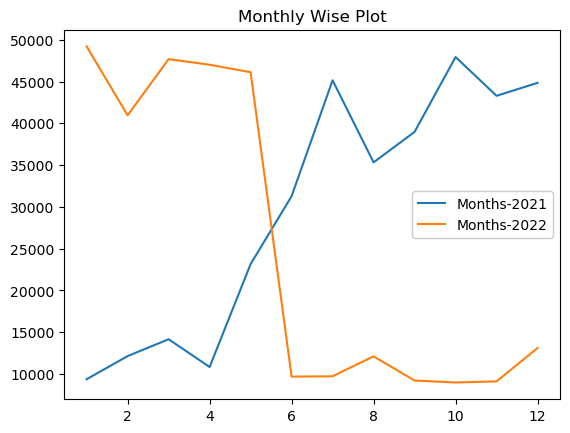

In [21]:
# trend across each month
monthly_sales21=year_2021.groupby('month')['total_sales'].sum()
monthly_sales22=year_2022.groupby('month')['total_sales'].sum()
plt.title('Monthly Wise Plot')
plt.plot(monthly_sales21,label='Months-2021')
plt.plot(monthly_sales22,label='Months-2022')

plt.legend(framealpha=1, frameon=True);

In [22]:
wf = year_2021.groupby('week')['total_sales'].sum()
wf1 = year_2022.groupby('week')['total_sales'].sum()


<AxesSubplot:xlabel='week'>

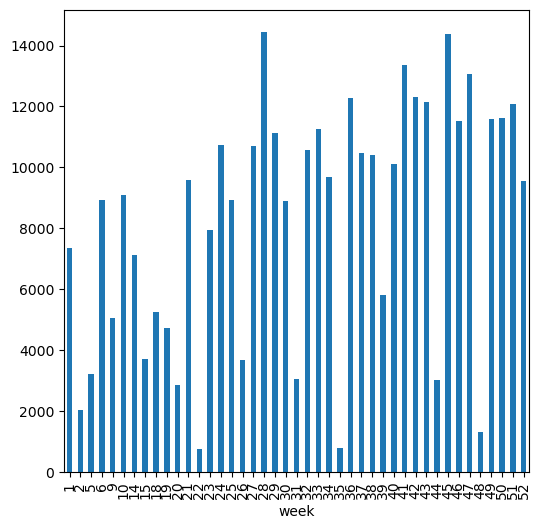

In [23]:
wf.plot(kind='bar', figsize=(6,6))

<AxesSubplot:xlabel='week'>

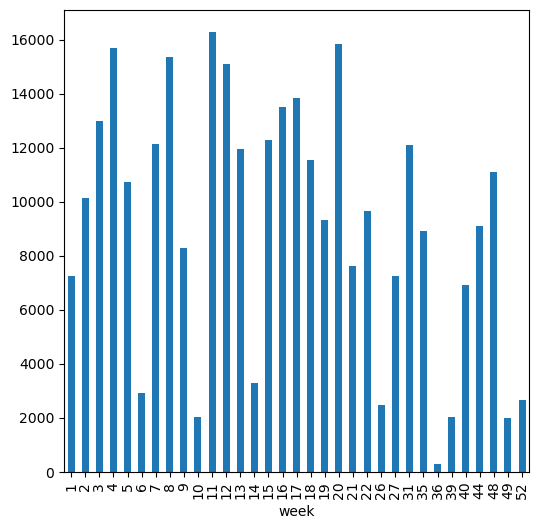

In [24]:
wf1.plot(kind='bar', figsize=(6,6))

In [25]:
day_sales = df.groupby('day')['total_sales'].sum()
day_sales

day
1     20451.38
2     24190.26
3     25852.16
4     26988.68
5     25046.16
6     16904.96
7     17967.18
8     16548.08
9     18829.52
10    21354.14
11    20692.24
12    23502.04
13    20189.28
14    22362.54
15    20739.34
16    19558.18
17    22233.50
18    20855.72
19    27108.28
20    18183.92
21    20342.98
22    21000.06
23    25115.68
24    23673.74
25    20348.84
26    28117.30
27    17371.48
28    21443.78
29    19110.42
30    21341.26
31    11970.38
Name: total_sales, dtype: float64

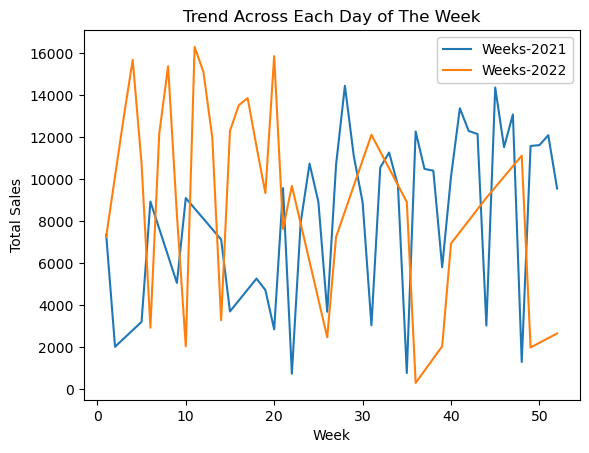

In [26]:
# trend across each day of the week 
weekly_sales21=year_2021.groupby('week')['total_sales'].sum()
weekly_sales22=year_2022.groupby('week')['total_sales'].sum()
plt.title('Trend Across Each Day of The Week')
plt.plot(weekly_sales21,label='Weeks-2021')
plt.plot(weekly_sales22,label='Weeks-2022')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend(framealpha=1, frameon=True);
plt.show()

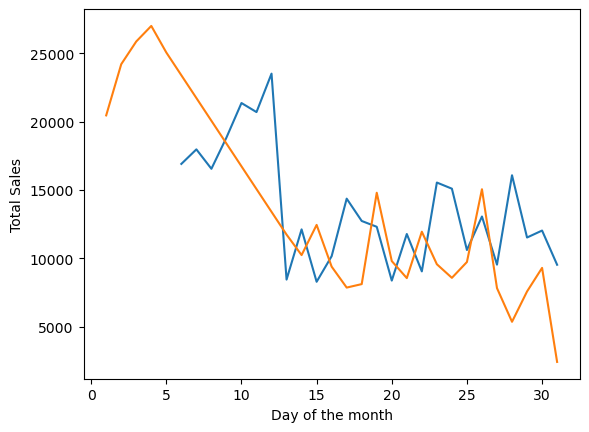

In [27]:
daily_sales21=year_2021.groupby('day')['total_sales'].sum()
daily_sales22=year_2022.groupby('day')['total_sales'].sum()

plt.plot(daily_sales21,label='Daily Sales-2021')
plt.xlabel('Day of the month')
plt.ylabel('Total Sales')
plt.plot(daily_sales22,label='Daily Sales-2022')

**sales trend line is not common among year, month, week, day**

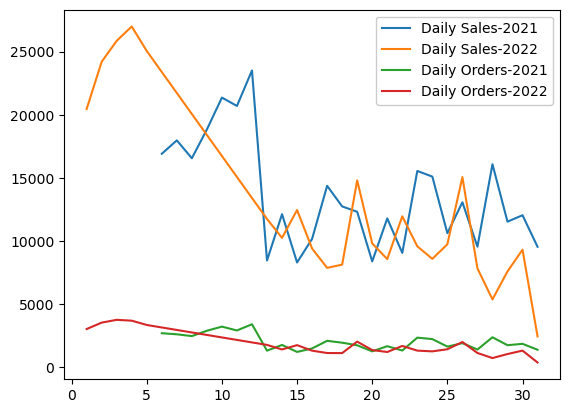

In [28]:
# trend across each day of the month
daily_sales21=year_2021.groupby('day')['total_sales'].sum()
daily_sales22=year_2022.groupby('day')['total_sales'].sum()

plt.plot(daily_sales21,label='Daily Sales-2021')
plt.plot(daily_sales22,label='Daily Sales-2022')

daily_orders21=year_2021.groupby('day')['orders'].sum()
daily_orders22=year_2022.groupby('day')['orders'].sum()

plt.plot(daily_orders21,label='Daily Orders-2021')
plt.plot(daily_orders22,label='Daily Orders-2022')
plt.legend(framealpha=1, frameon=True);
plt.show()

 ### 2. How weekends are affecting the total sales trend when compared with weekdays?Draw an inference for the same (Graph also Expected)

In [29]:
df['weekday2']=pd.to_datetime(df['hour']).dt.weekday

In [30]:
weeksales = df.groupby('weekday2')['total_sales'].sum()

Text(0, 0.5, 'Total Sales')

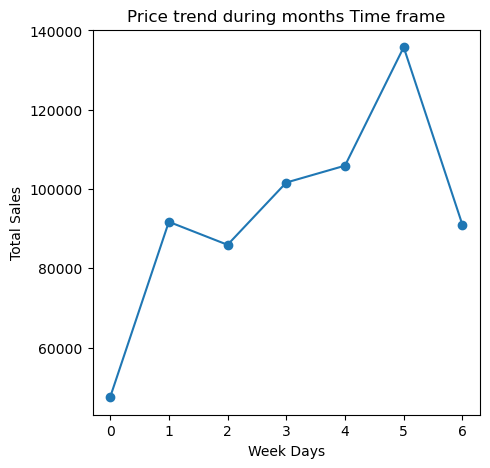

In [31]:
fig = weeksales.plot(kind='line', figsize=(5,5), marker='o')
fig.set_title('Price trend during months Time frame')
fig.set_xlabel('Week Days')
fig.set_ylabel('Total Sales')

**Sales are more on Saturday as compared to weekdays** Sales are in increasing till saturday and decreasing on sunday

### 3. Should the prices should vary in weekdays and weekends?

In [32]:
wpf = df.groupby('name')['product_price'].sum()
wpf

name
0    22320.63
1    42964.44
2    40347.19
3    47246.57
4    49547.94
5    63525.57
6    42872.75
Name: product_price, dtype: float64

**Since the sale seems to be less on weekdays therefore, prices can be kept low to boost sales, whereas during weekends the prices should be increased since the sales are higher**

### 4. What is the peak time interms of orders and sales?

In [33]:
df['time'] = df['hour'].dt.time
df['time'].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: time, dtype: object

In [34]:
io = df.groupby('time')['orders','total_sales'].sum()
io

C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\3864193298.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  io = df.groupby('time')['orders','total_sales'].sum()


,orders,total_sales
time,,
00:00:00,31,415.36
01:00:00,37,364.36
02:00:00,16,87.82
03:00:00,0,0.00
04:00:00,0,0.00
05:00:00,9,90.86
06:00:00,10,71.76
07:00:00,56,486.38
08:00:00,91,1022.36


Text(0, 0.5, 'Total Sales')

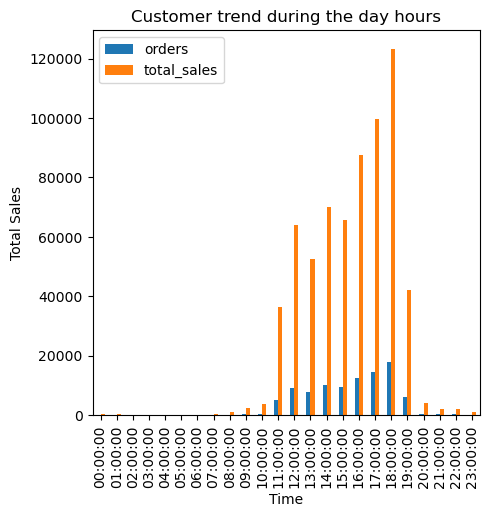

In [35]:
fig = io.plot(kind='bar', figsize=(5,5))
fig.set_title('Customer trend during the day hours')
fig.set_xlabel('Time')
fig.set_ylabel('Total Sales')

**The peak hours in terms of orders and sales is between 16 to 18 hours of the day or 4 to 6 pm**

### 5. Are the orders decreasing or increasing in every month,year? (Graph Expected)

In [36]:
year_order = df.groupby('year')['orders'].sum()
year_order

year
2021    52725
2022    42571
Name: orders, dtype: int64

<AxesSubplot:xlabel='year'>

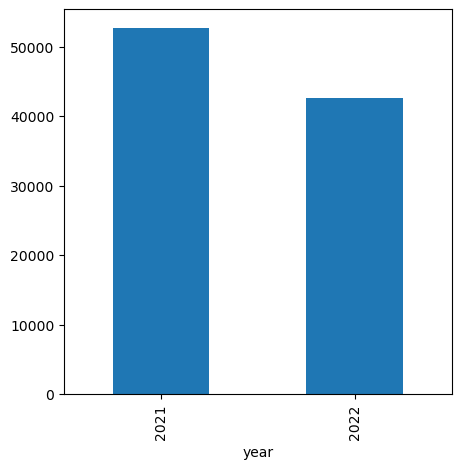

In [37]:
year_order.plot(kind='bar', figsize=(5,5))

**The orders have decreased from previous year**

In [38]:
month_order = df.groupby('month_year')['orders'].sum()
month_order

month_year
2021-01    1446
2021-02    1793
2021-03    2055
2021-04    1561
2021-05    3720
2021-06    4638
2021-07    6510
2021-08    5274
2021-09    5907
2021-10    6958
2021-11    6414
2021-12    6449
2022-01    7086
2022-02    6030
2022-03    6629
2022-04    6415
2022-05    6252
2022-06    1437
2022-07    1363
2022-08    1666
2022-09    1332
2022-10    1218
2022-11    1344
2022-12    1799
Freq: M, Name: orders, dtype: int64

Text(0, 0.5, 'Orders')

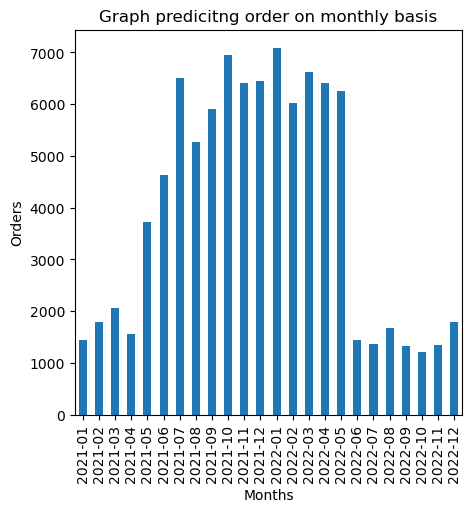

In [39]:
fig = month_order.plot(kind='bar', figsize=(5,5))
fig.set_title('Graph predicitng order on monthly basis')
fig.set_xlabel('Months')
fig.set_ylabel('Orders')


**The order 10th month of 2021 to 5th month of 2022 the sales increased but in the end of 2022 it decreased**

### 6.is there any trend between products sold in a particular timeline?

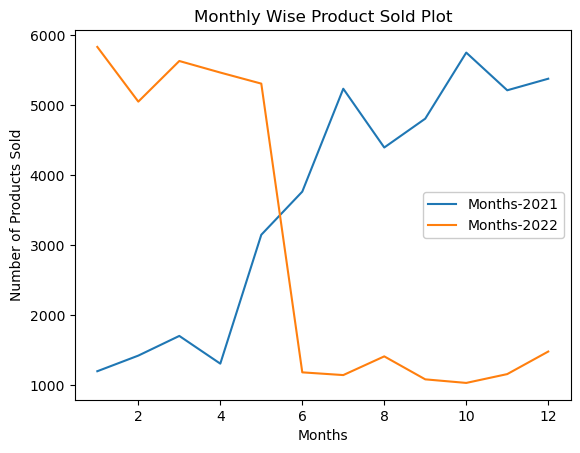

In [40]:
# trend across each month
monthly_orders21=year_2021.groupby('month')['product_type'].count()
monthly_orders22=year_2022.groupby('month')['product_type'].count()
plt.title('Monthly Wise Product Sold Plot')
plt.xlabel('Months')
plt.ylabel('Number of Products Sold')
plt.plot(monthly_orders21,label='Months-2021')
plt.plot(monthly_orders22,label='Months-2022')

plt.legend(framealpha=1, frameon=True);

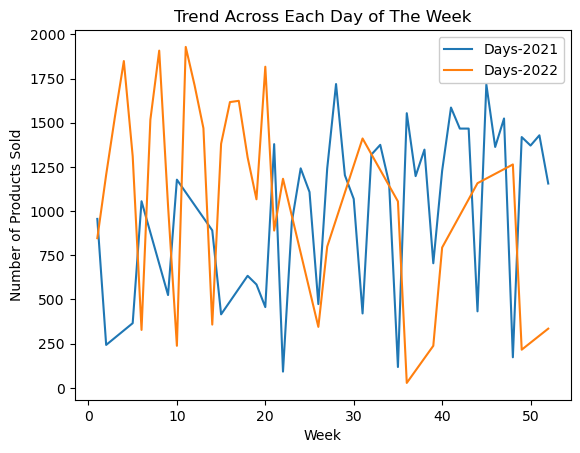

In [41]:
# trend across each day of the week 
weekly_orders21=year_2021.groupby('week')['product_type'].count()
weekly_orders22=year_2022.groupby('week')['product_type'].count()
plt.title('Trend Across Each Day of The Week')
plt.xlabel('Week')
plt.ylabel('Number of Products Sold')
plt.plot(weekly_orders21,label='Days-2021')
plt.plot(weekly_orders22,label='Days-2022')
plt.legend(framealpha=1, frameon=True);
plt.show()

In [42]:
#df1['year']=pd.to_datetime(df1['hour']).dt.year
#df1['day']=pd.to_datetime(df1['hour']).dt.day
#df1['month']=pd.to_datetime(df1['hour']).dt.month
#df1['weekday']=pd.to_datetime(df1['hour']).dt.weekday
year_2021['time']=pd.to_datetime(year_2021['hour']).dt.hour
year_2022['time']=pd.to_datetime(year_2022['hour']).dt.hour

C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\1029761874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2021['time']=pd.to_datetime(year_2021['hour']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\1029761874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022['time']=pd.to_datetime(year_2022['hour']).dt.hour


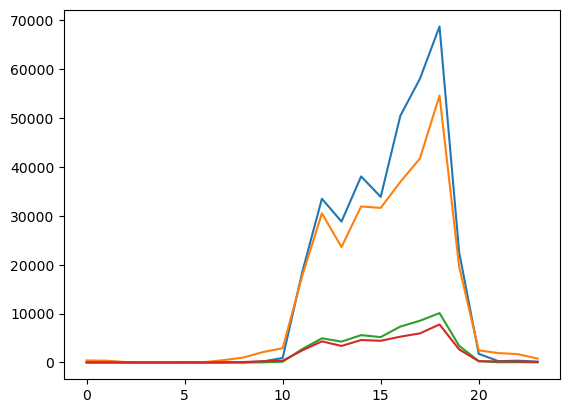

In [43]:
# trend across each hour of the day
hourly_sales21=year_2021.groupby('time')['total_sales'].sum()
hourly_sales22=year_2022.groupby('time')['total_sales'].sum()

plt.plot(hourly_sales21)
plt.plot(hourly_sales22)

hourly_orders21=year_2021.groupby('time')['orders'].sum()
hourly_orders22=year_2022.groupby('time')['orders'].sum()

plt.plot(hourly_orders21)
plt.plot(hourly_orders22)
plt.show()

On daily timeline it is found that people are buying more product between time period 16 to 18 hours that is evening 4 to 6 pm

Similarly on monthly basis data of 2 years maximum sales period may 2021 to may 2022

### 7.Which statistical measure will you use to find the peak orders ?

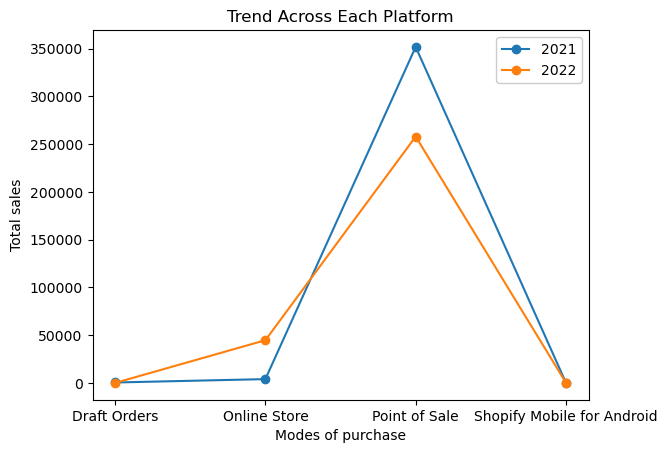

In [44]:
weekly_peak_sales21=year_2021.groupby('api_client_title')['total_sales'].sum()
weekly_peak_sales22=year_2022.groupby('api_client_title')['total_sales'].sum()
plt.title('Trend Across Each Platform')
plt.plot(weekly_peak_sales21,label='2021',marker='o')
plt.plot(weekly_peak_sales22,label='2022',marker='o')

plt.legend(framealpha=1, frameon=True);
plt.xlabel('Modes of purchase')
plt.ylabel('Total sales')
plt.show()

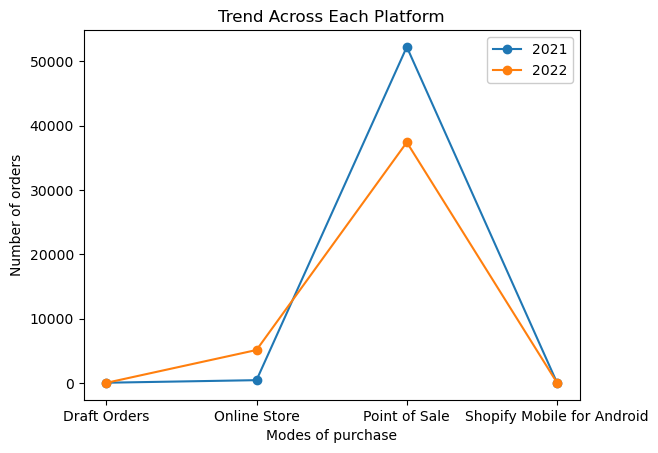

In [45]:
weekly_peak_orders21=year_2021.groupby('api_client_title')['orders'].sum()
weekly_peak_orders22=year_2022.groupby('api_client_title')['orders'].sum()
plt.title('Trend Across Each Platform')
plt.plot(weekly_peak_orders21,label='2021',marker='o')
plt.plot(weekly_peak_orders22,label='2022',marker='o')


plt.legend(framealpha=1, frameon=True);
plt.xlabel('Modes of purchase')
plt.ylabel('Number of orders')
plt.show()

### 8.Is there any particular time (hrs) the customers tend to order more?

In [46]:
time_order = df.groupby('time')['orders'].sum()

Text(0, 0.5, 'Order')

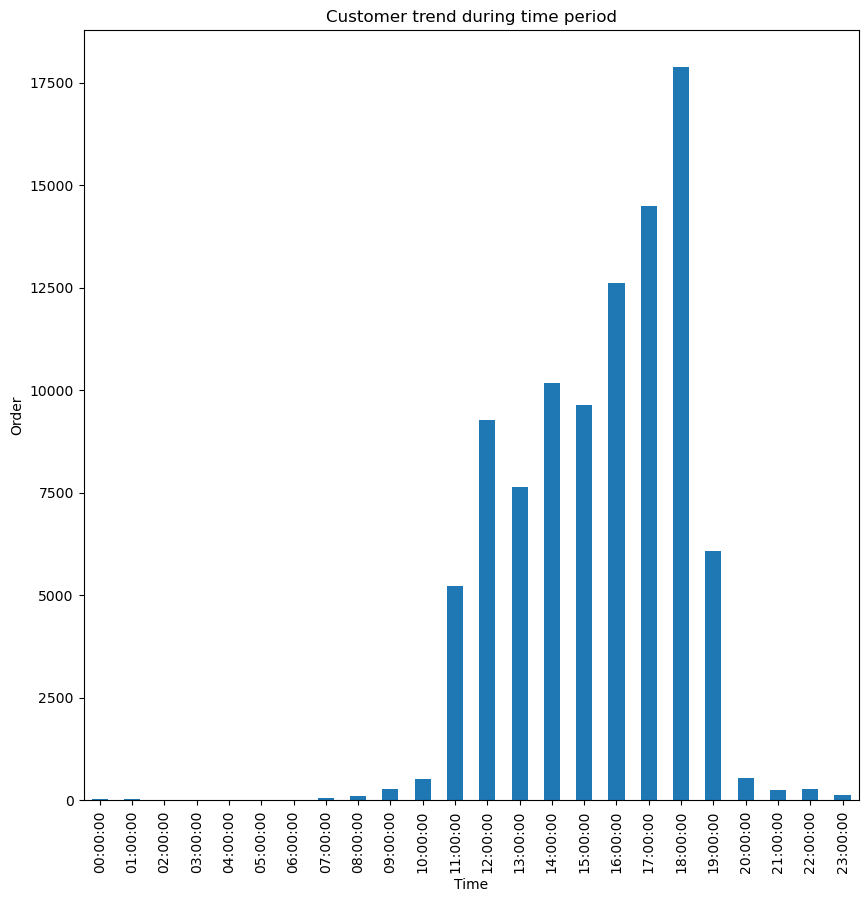

In [47]:
fig = time_order.plot(kind='bar', figsize=(10,10))
fig.set_title('Customer trend during time period')
fig.set_xlabel('Time')
fig.set_ylabel('Order')

**The time period between 16 hrs to 18 hrs customer order more**

### 9. How should the prices vary for every hour in day?

In [48]:
price_very = df.groupby('time')['discounts','product_price'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9092\1338531682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_very = df.groupby('time')['discounts','product_price'].sum()


In [49]:
price_very.head()

,discounts,product_price
time,,
00:00:00,-84.72,174.01
01:00:00,0.00,145.64
02:00:00,0.00,38.07
03:00:00,0.00,0.00
04:00:00,0.00,0.00


Text(0, 0.5, 'Product Price')

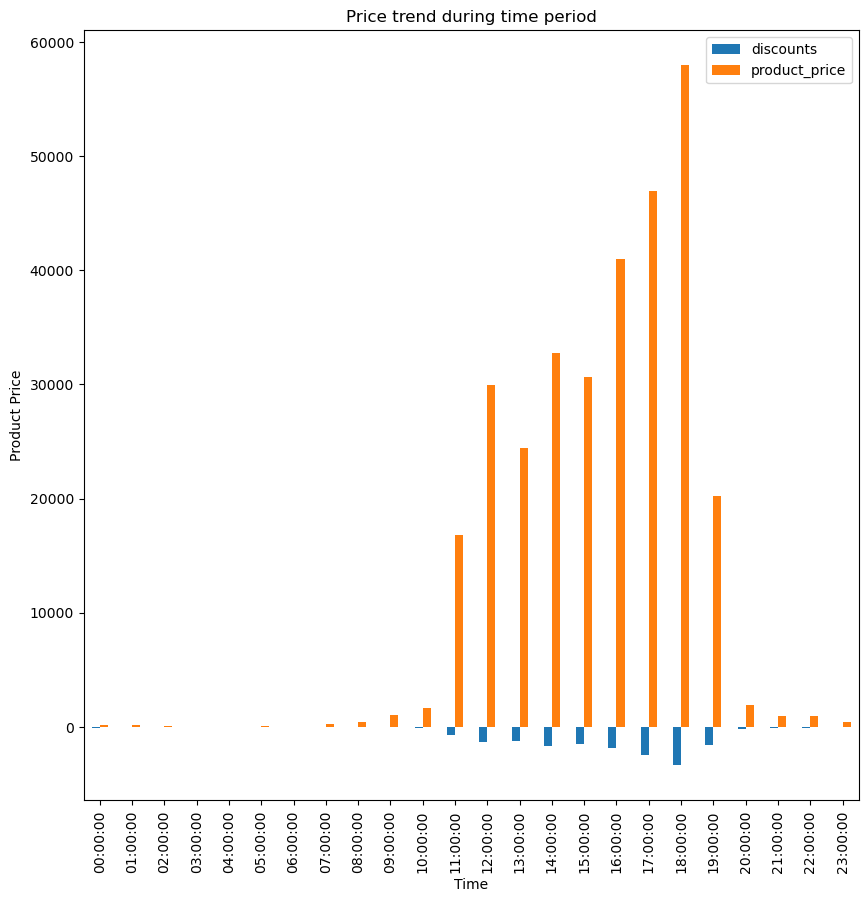

In [50]:
fig = price_very.plot(kind='bar', figsize=(10,10))
fig.set_title('Price trend during time period')
fig.set_xlabel('Time')
fig.set_ylabel('Product Price')

**prices are varying due to discounts given**

### 10. Do you observe any seasonality or trend online sale are more in weekends than weekdays?

In [51]:
df['api_client_title'].unique()

array([nan, 'Point of Sale', 'Online Store', 'Shopify Mobile for Android',
       'Draft Orders'], dtype=object)

In [52]:
for col in df['api_client_title']:
    if ((col == 'Online Store') or (col=='Shopify Mobile for Android')):
        weeksales1 = df.groupby('weekday2')['total_sales'].sum()
    

Text(0, 0.5, 'Total Sales')

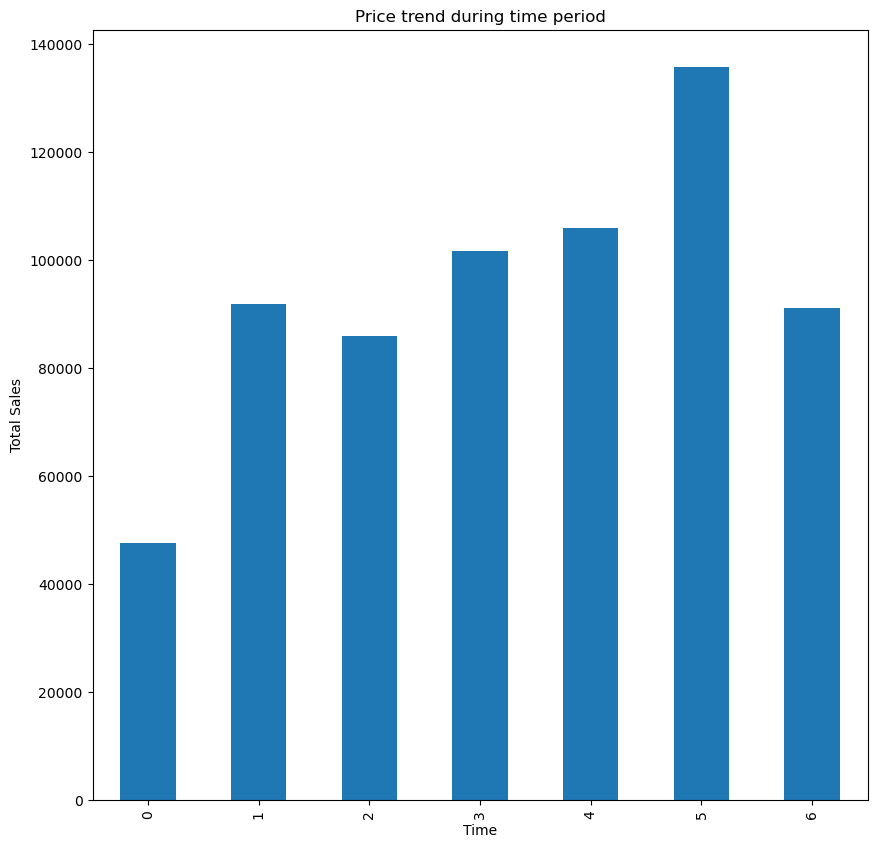

In [53]:
fig = weeksales1.plot(kind='bar', figsize=(10,10))
fig.set_title('Price trend during time period')
fig.set_xlabel('Time')
fig.set_ylabel('Total Sales')

Text(0, 0.5, 'Online Sale')

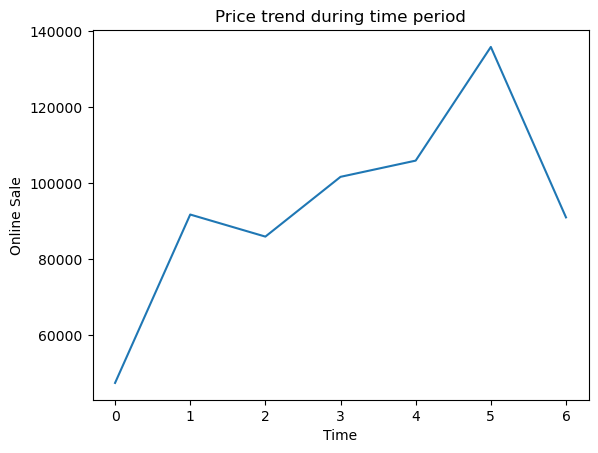

In [54]:
plt.title('Price trend during time period')
plt.plot(weeksales1)
plt.xlabel('Time')
plt.ylabel('Online Sale')

### Imputers Exercise

*Random Imputation from sample taken*

In [55]:
import time
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [56]:
#start_time = time.time()

In [57]:
#for col in mdf.columns:
    #mdf[col][mdf[col].isnull()] = mdf[col].dropna().sample(mdf[col].isnull().sum()).values

In [58]:
'''class imputer_implementation:
    def __init__(self, col):
        self.col = col
        
    def simple_imputer_mode(self):
        imp_imputer = SimpleImputer(strategy='most_frequent')
        imp_imputer.fit_transform([self.col])
    def simple_imputer_constant(self):
        print("inside constant imputer")
        con_imputer = SimpleImputer(missing_values=np.nan, strategy ='constant', fill_value='#20440')
        self.col = con_imputer.fit_transform([self.col])
        print("applied imputer")'''
        

'class imputer_implementation:\n    def __init__(self, col):\n        self.col = col\n        \n    def simple_imputer_mode(self):\n        imp_imputer = SimpleImputer(strategy=\'most_frequent\')\n        imp_imputer.fit_transform([self.col])\n    def simple_imputer_constant(self):\n        print("inside constant imputer")\n        con_imputer = SimpleImputer(missing_values=np.nan, strategy =\'constant\', fill_value=\'#20440\')\n        self.col = con_imputer.fit_transform([self.col])\n        print("applied imputer")'

In [59]:
#obj = imputer_implementation(df['order_name'])

In [60]:
#obj.simple_imputer_constant()

In [61]:
#df['order_name'].unique()

In [62]:
#print("--- %s seconds ---" % (time.time() - start_time))

### MICE Iterative Imputer

In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [70]:
start_time = time.time()

In [71]:
lr = LinearRegression()

In [72]:
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=10, tol= 1e-10, imputation_order='roman')

In [73]:
imp.fit_transform(df.drop(['hour', 'order_name',
                          'product_type', 'product_title',
                          'product_vendor', 'variant_title',
                          'variant_title','api_client_title','time','month_year'] ,axis=1))

[IterativeImputer] Completing matrix with shape (101929, 22)
[IterativeImputer] Ending imputation round 1/10, elapsed time 3.01
[IterativeImputer] Change: 0.0, scaled tolerance: 4304.96 
[IterativeImputer] Early stopping criterion reached.


array([[ 0.,  0.,  0., ..., 23.,  6.,  6.],
       [ 0.,  0.,  0., ..., 23.,  6.,  6.],
       [ 0.,  0.,  0., ..., 23.,  6.,  6.],
       ...,
       [ 0.,  0.,  0., ..., 26.,  3.,  3.],
       [ 0.,  0.,  0., ..., 26.,  3.,  3.],
       [ 0.,  0.,  0., ..., 26.,  3.,  3.]])

In [74]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 12.472141027450562 seconds ---


### Mode or Most frequent imputation

In [75]:
start_time = time.time()

In [76]:
imp_imputer = SimpleImputer(strategy='most_frequent')
imp_imputer.fit_transform([df['order_name']])

array([['#1078', '#1078', '#1078', ..., '#20442', '#20445', '#20442']],
      dtype=object)

In [77]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.760043621063232 seconds ---
